# 2. 线性回归实现与应用

## 2.4. 一元线性回归

In [1]:
import numpy as np

x = np.array([56, 72, 69, 88, 102, 86, 76, 79, 94, 74])
y = np.array([92, 102, 86, 110, 130, 99, 96, 102, 105, 92])

In [2]:
import seaborn as sns
custom_params = {"figure.figsize": (6, 4),
                 "font.sans-serif":"Arial Unicode MS",
                 'axes.unicode_minus': False}
sns.set_theme(style="ticks", font_scale=0.7, rc=custom_params)

Text(0, 0.5, 'Price')

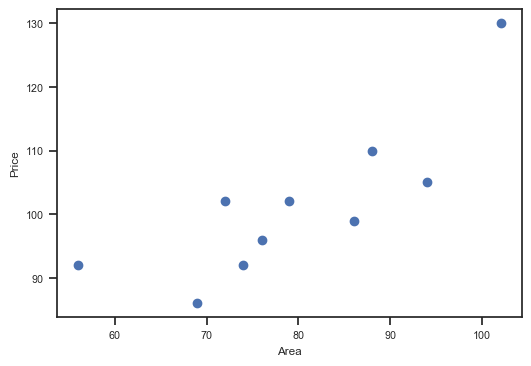

In [3]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.scatter(x, y)
plt.xlabel('Area')
plt.ylabel('Price')

正如上面所说，线性回归即通过线性方程去拟合数据点。那么，我们可以令该 1 次函数的表达式为：
$$y(x, w) = w_0 + w_1x \tag{1}$$

## 2.5. 平方损失函数 (square loss)

正如上面所说，如果一个数据点为 ($x_{i}$, $y_{i}$)，那么它对应的误差 (Error) 就为:

$$y_{i}-(w_0 + w_1x_{i}) \tag{2}$$


上面的误差往往也称之为「 **残差**」 (Residual)。但是在机器学习中，我们更喜欢称作「 **损失** 」 (Loss)，即真实值和预测值之间的偏离程度。那么，对 $n$ 个全部数据点而言，其对应的残差损失总和就为：

$$\sum\limits_{i = 1}^n {{{(y_{i}-(w_0 + w_1x_{i}))}}}
                    \tag{3}$$

更进一步，在线性回归中，我们一般使用残差的平方和来表示所有样本点的误差。公式如下：

$$\sum\limits_{i = 1}^n {{{(y_{i}-(w_0 + w_1x_{i}))}}^2}
                    \tag{4}$$

- 残差：$r_i = y_i - \hat{y}_i$
- 平方损失函数：$L(y, \hat{y}) = \sum_{i=1}^n (y_i - \hat{y}_i)^2$

## 2.6. 最小二乘法代数求解


最小二乘法是用于求解线性回归拟合参数 $w$ 的一种常用方法。最小二乘法中的「二乘」代表平方，最小二乘也就是最小平方。而这里的平方就是指代上面的平方损失函数。

简单来讲，最小二乘法也就是求解平方损失函数最小值的方法。那么，到底该怎样求解呢？这就需要使用到高等数学中的知识。推导如下：

首先，平方损失函数为：
$$f = \sum\limits_{i = 1}^n {{{(y_{i}-(w_0 +
                    w_1x_{i}))}}^2} \tag{5}$$
 
我们的目标是求取平方损失函数 $min(f)$ 最小时，对应的 $w$。首先求 $f$ 的 1 阶偏导数：

$$\frac{\partial f}{\partial
                    w_{0}}=-2(\sum_{i=1}^{n}{y_i}-nw_{0}-w_{1}\sum_{i=1}^{n}{x_i})
                    \tag{6a}$$
 
$$\frac{\partial f}{\partial
                    w_{1}}=-2(\sum_{i=1}^{n}{x_iy_i}-w_{0}\sum_{i=1}^{n}{x_i}-w_{1}\sum_{i=1}^{n}{x_i}^2)
                    \tag{6b}$$
然后，我们令 $\frac{\partial f}{\partial w_{0}}=0$ 以及 $\frac{\partial f}{\partial w_{1}}=0$，解得：

$$w_{1}=\frac
                    {n\sum_{}^{}{x_iy_i}-\sum_{}^{}{x_i}\sum_{}^{}{y_i}}
                    {n\sum_{}^{}{x_i}^2-(\sum_{}^{}{x_i})^2} \tag{7b}$$ 
 
$$w_{0}=\frac
                    {\sum_{}^{}{x_i}^2\sum_{}^{}{y_i}-\sum_{}^{}{x_i}\sum_{}^{}{x_iy_i}}
                    {n\sum_{}^{}{x_i}^2-(\sum_{}^{}{x_i})^2} \tag{7b}$$
 
到目前为止，已经求出了平方损失函数最小时对应的 $w$ 参数值，这也就是最佳拟合直线。

## 2.7. 最小二乘法矩阵求解


学习完上面的内容，相信你已经了解了什么是最小二乘法，以及如何使用最小二乘法进行线性回归拟合。上面，我们采用了求偏导数的方法，并通过代数求解找到了最佳拟合参数 $w$ 的值。这里尝试另外一种方法，即通过矩阵的变换来计算参数 $w$。

首先，一元线性函数的表达式为 $y(x, w) = w_0 + w_1x$，表达成矩阵形式为：

$$\begin{split} \left[ \begin{array}{c}{1, x_{1}} \\ {1,
                    x_{2}} \\ {\cdots} \\ {1, x_{9}} \\ {1,
                    x_{10}}\end{array}\right] \left[ \begin{array}{c}{w_{0}} \\
                    {w_{1}}\end{array}\right] = \left[ \begin{array}{c}{y_{1}}
                    \\ {y_{2}} \\ {\cdots} \\ {y_{9}} \\
                    {y_{10}}\end{array}\right] \Rightarrow \left[
                    \begin{array}{c}{1,56} \\ {1,72} \\ {\cdots} \\ {1,94} \\
                    {1,74}\end{array}\right] \left[ \begin{array}{c}{w_{0}} \\
                    {w_{1}}\end{array}\right]=\left[ \begin{array}{c}{92} \\
                    {102} \\ {\cdots} \\ {105} \\ {92}\end{array}\right]
                    \end{split}$$
 
即：
$$y(x, w) = XW \tag{8b}$$
 
$(8)$ 式中， $W$ 为 $\begin{bmatrix}w_{0} \\ w_{1} \end{bmatrix}$，而 $X$ 则是 $\begin{bmatrix}1, x_{1} \\ 1, x_{2} \\ \cdots \\ 1,
                      x_{9} \\ 1, x_{10} \end{bmatrix}$ 矩阵。然后，平方损失函数为：

$$f = \sum\limits_{i = 1}^n {{{(y_{i}-(w_0 +
                    w_1x_{i}))}}}^2 =(y-XW)^T(y-XW)\tag{9}$$
 
通过对公式 $(9)$ 实施矩阵计算乘法分配律得到：

$$f = y^{T}y - y^{T}(XW) - (XW)^{T}y + (XW)^{T}(XW)
                    \tag{10}$$
 
在该公式中 $y$ 与 $XW$ 皆为相同形式的 $(m,1)$ 矩阵，由此两者相乘属于线性关系，所以等价转换如下：

$$\begin{split} f = y^{T}y - (XW)^{T}y - (XW)^{T}y +
                    (XW)^{T}(XW)\\ = y^{T}y - 2 (XW)^{T}y + (XW)^{T}(XW)
                    \end{split}$$
 
此时，对 [矩阵求偏导数](https://en.wikipedia.org/wiki/Matrix_calculus) 得到：
$$\frac{\partial f}{\partial W}=2X^TXW-2X^Ty=0 \tag{12}$$
 
 
当矩阵 $X^TX$ 满秩时，$(X^TX)^{-1}X^TX=E$ ，且 $EW=W$。所以有 $(X^TX)^{-1}X^TXW=(X^TX)^{-1}X^Ty$，并最终得到：
$$W=(X^TX)^{-1}X^Ty \tag{13}$$

## 2.8. 线性回归 scikit-learn 实现

```python
sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

# - fit_intercept: 默认为 True，计算截距项。
# - normalize: 默认为 False，不针对数据进行标准化处理。
# - copy_X: 默认为 True，即使用数据的副本进行操作，防止影响原数据。
# - n_jobs: 计算时的作业数量。默认为 1，若为 -1 则使用全部 CPU 参与运算。
```

In [4]:
from sklearn.linear_model import LinearRegression

# 定义线性回归模型
model = LinearRegression()
model.fit(x.reshape(x.shape[0], 1), y)  # 训练, reshape 操作把数据处理成 fit 能接受的形状

# 得到模型拟合参数
model.intercept_, model.coef_

(41.33509168550617, array([0.75458428]))

In [5]:
model.predict([[150]])

array([154.52273298])

## 2.9. 线性回归综合案例

In [6]:
import pandas as pd

url = 'https://github.com/NishadKhudabux/Boston-House-Price-Prediction/raw/refs/heads/main/Boston.csv'
# column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

df = pd.read_csv(url, header=0)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [7]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [8]:
df.columns = [x.lower() for x in df.columns]

features = df[["crim", "rm", "lstat"]]
features.describe()

,crim,rm,lstat
count,506.000000,506.000000,506.000000
mean,3.613524,6.284634,12.653063
std,8.601545,0.702617,7.141062
min,0.006320,3.561000,1.730000
25%,0.082045,5.885500,6.950000
50%,0.256510,6.208500,11.360000
75%,3.677083,6.623500,16.955000
max,88.976200,8.780000,37.970000


In [9]:
target = df["medv"]  # 目标值数据

from sklearn.model_selection import train_test_split

# 将特征和目标值分开
X = features
y = target

# 使用 train_test_split 分割数据，将 30% 的数据作为测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 查看数据集的形状
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(354, 3) (354,) (152, 3) (152,)


In [10]:
model = LinearRegression()  # 建立模型
model.fit(X_train, y_train)  # 训练模型
model.coef_, model.intercept_  # 输出训练后的模型参数和截距项

(array([-0.12362012,  5.09661773, -0.60817459]), -1.2405510324250422)

上面的单元格中，我们输出了线性回归模型的拟合参数。也就是最终的拟合线性函数近似为：

$$f = -0.1236 * x_{1} + 5.0966 * x_{2} -0.6081 * x_{3} -1.2405 \tag{14}$$

其中，$x_{1}$, $x_{2}$ 和 $x_{3}$ 分别对应数据集中 `CRIM`, `RM` 和 `LSTAT` 列。接下来，向训练好的模型中输入测试集的特征得到预测值。

In [11]:
preds = model.predict(X_test)  # 输入测试集特征进行预测
preds  # 预测结果

array([25.95010416, 31.04855815, 18.2497264 , 26.3019832 , 19.72042823,
       23.46871069, 17.71366141, 15.49650764, 22.17984511, 20.73388426,
       18.17724891, 18.93873596, -6.35437003, 23.00971662, 20.67587505,
       26.66807591, 18.01857996,  3.23670389, 37.08732784, 18.10256111,
       26.53443298, 27.41308736, 13.99188946, 26.47265903, 18.95326059,
       14.39064862, 23.15222471, 20.49447042, 18.61054869, 19.6808132 ,
       18.20651772, 27.11073871, 25.4330687 , 19.43551217, 15.84148017,
       17.98728092, 32.92433015, 22.70715097, 20.73270312, 25.97803613,
       13.33760731, 29.08053218, 37.95164944, 19.29216769, 26.10063642,
       16.60989702, 16.51288715, 27.36660097, 19.7455285 , 29.24021979,
       21.30002643, 31.4765798 , 18.52548865, 28.64078242, 34.84253501,
       24.04067339, 19.66522085, 31.69779263, 25.46484613, 16.07543617,
       27.42948149, 32.77789044, 29.81113896, 19.35780323, 28.9413907 ,
       11.89916031, 20.25014766, 26.78687738, 29.74091303, 17.07

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# import mean_absolute_error, mean_squared_error

mae_ = mean_absolute_error(y_test, preds)
mse_ = mean_squared_error(y_test, preds)

print("scikit-learn MAE: ", mae_)
print("scikit-learn MSE: ", mse_)

scikit-learn MAE:  4.111995393754922
scikit-learn MSE:  29.975964330767464
